In [1]:
import pandas as pd

In [8]:
ng_sensors = pd.read_csv('../data/NG Sensors 20250507-20250523.csv', sep=';')
pv_sensors = pd.read_csv('../data/PV Sensors 20250507-20250523.csv', sep=';')

ng_green_cvg = pd.read_csv('../data/ng_green_cvg.csv')
pv_green_cvg = pd.read_csv('../data/pv_green_cvg.csv')

In [9]:
ng_sensors.head()

,Timestamp,br1,ec,hum,ph,tp
0,2025-05-07 05:30:00,14661.495333,0.417758,65.203833,5.814583,22.454333
1,2025-05-07 06:30:00,14431.841833,0.663790,65.929375,6.088292,23.986917
2,2025-05-07 07:30:00,14492.318500,0.963145,67.608292,8.007542,24.361667
3,2025-05-07 08:30:00,14491.092250,0.935417,68.418292,8.210042,24.555750
4,2025-05-07 09:30:00,14450.943875,0.936954,64.895667,7.173125,24.715917


In [10]:
ng_sensors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  392 non-null    object 
 1   br1        392 non-null    float64
 2   ec         392 non-null    float64
 3   hum        392 non-null    float64
 4   ph         392 non-null    float64
 5   tp         392 non-null    float64
dtypes: float64(5), object(1)
memory usage: 18.5+ KB


In [12]:
ng_data = pd.merge(ng_sensors, ng_green_cvg, on='Timestamp', how='left')
pv_data = pd.merge(pv_sensors, pv_green_cvg, on='Timestamp', how='left')

In [13]:
pv_df = pv_data.dropna()
ng_df = ng_data.dropna()

In [ ]:
pv_df.head(10)

,Timestamp,br2,ec,hum,ph,tp,green_cvg
1,2025-05-07 06:30:00,8967.704750,0.620898,63.370750,6.592958,25.289583,32.579715
4,2025-05-07 09:30:00,8868.954375,0.913952,62.605167,9.014208,25.915708,9.658278
5,2025-05-07 10:30:00,8903.577125,0.930121,51.171708,8.042750,25.872792,6.344476
7,2025-05-07 12:30:00,8914.350833,0.919727,44.866083,6.748333,26.840708,6.111562
8,2025-05-07 13:30:00,8962.599708,0.910776,46.928625,7.098083,27.785250,13.941359
9,2025-05-07 14:30:00,8965.416208,0.922903,43.647333,8.870125,29.144583,14.957586
10,2025-05-07 15:30:00,8920.603625,0.963612,43.623958,8.257333,29.045083,20.816144
11,2025-05-07 16:30:00,8921.480542,0.983534,43.953542,7.200000,28.124167,11.686757
12,2025-05-07 17:30:00,0.227429,0.913991,42.851127,7.204507,26.904789,5.088267
13,2025-05-07 18:30:00,0.000000,0.878579,43.129403,6.892090,25.741045,9.118967


In [14]:
pv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 1 to 370
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  83 non-null     object 
 1   br2        83 non-null     float64
 2   ec         83 non-null     float64
 3   hum        83 non-null     float64
 4   ph         83 non-null     float64
 5   tp         83 non-null     float64
 6   green_cvg  83 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.2+ KB


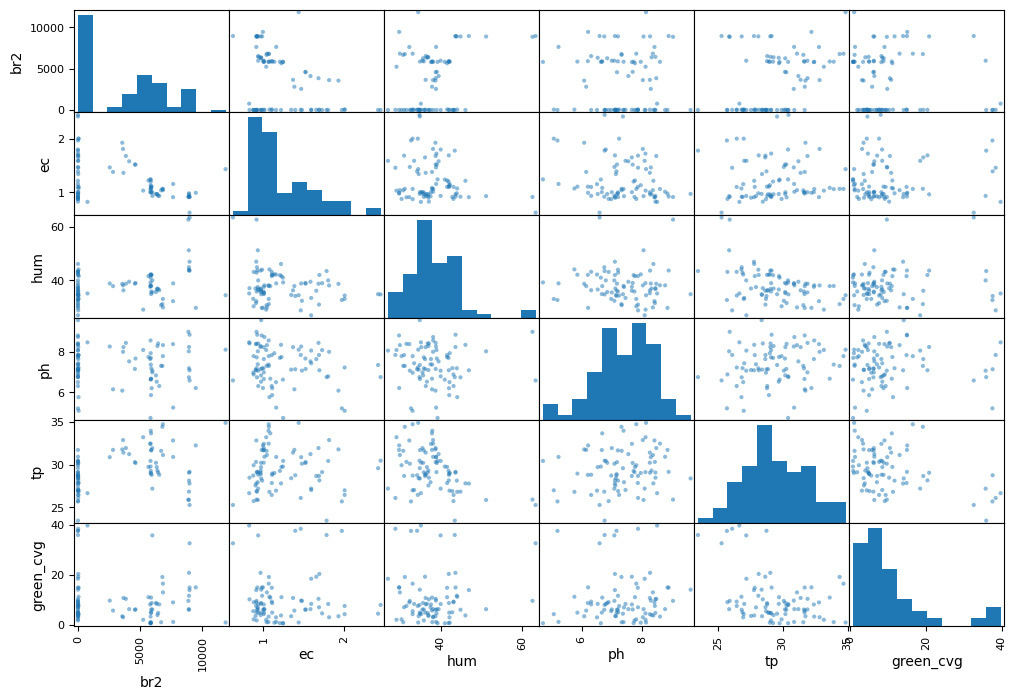

In [25]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

scatter_matrix(pv_df[['br2', 'ec', 'hum', 'ph', 'tp', 'green_cvg']], figsize=(12, 8))
# plt.title('PV data distribution', loc='center')
plt.show()


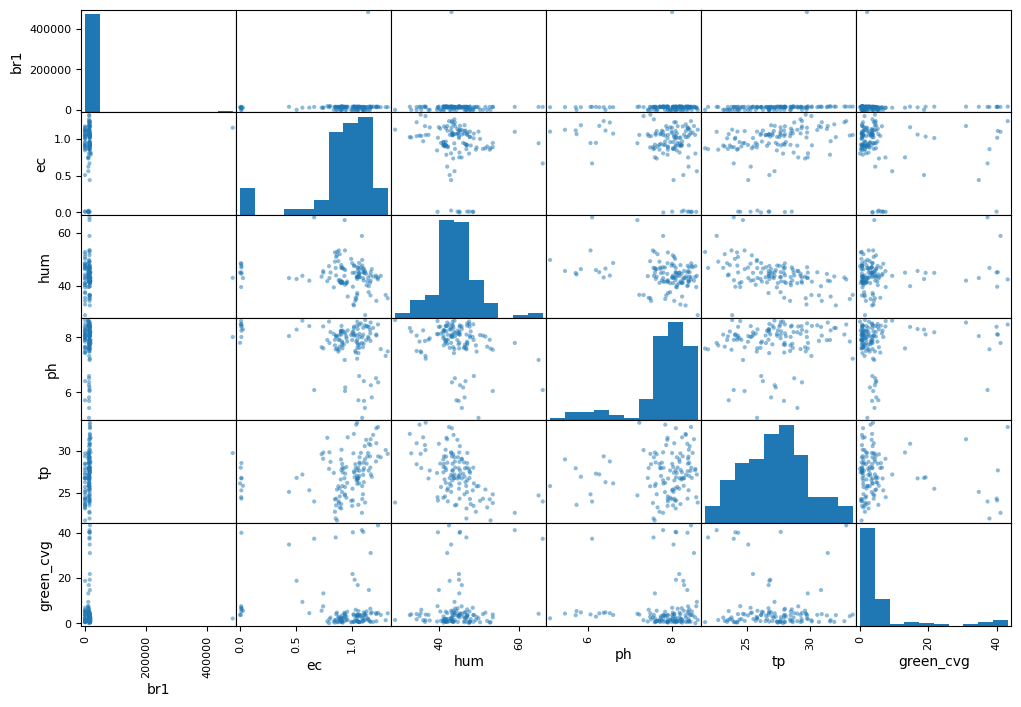

In [26]:
scatter_matrix(ng_df[['br1', 'ec', 'hum', 'ph', 'tp', 'green_cvg']], figsize=(12, 8))
# plt.title('PV data distribution', loc='center')
plt.show()